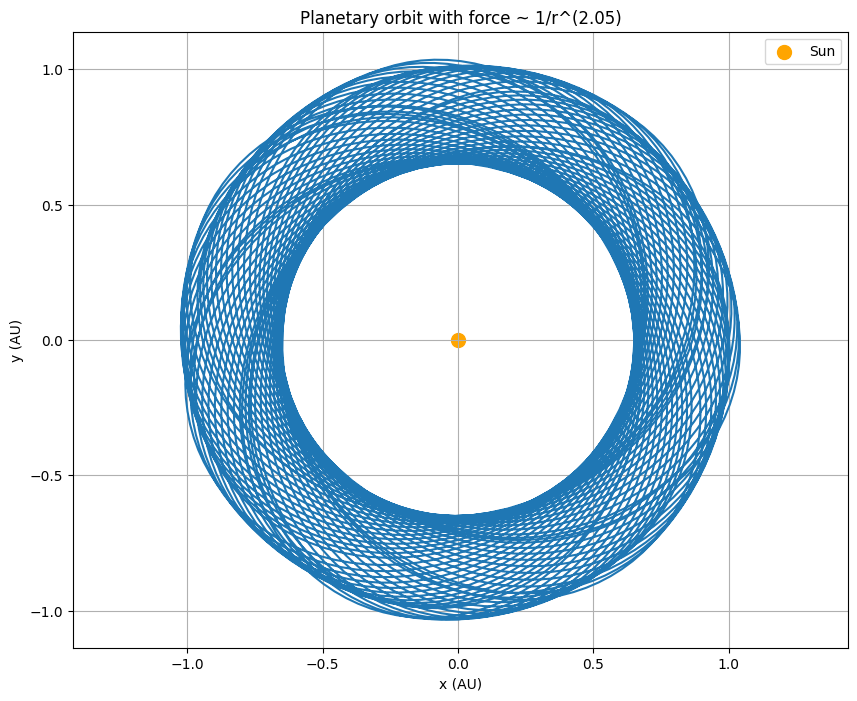

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ode_solver import solve_ode, EulerRichardson

def modified_force(t, state, args):
    """
    Force with modified inverse square law: F = C/r^(2+epsilon)

    args contains the parameter dictionary
    """
    epsilon = args['epsilon']
    C = args['C']

    x, y, vx, vy = state
    r2 = x**2 + y**2
    r = np.sqrt(r2)
    r_power = r**(2+epsilon)

    # Derivatives
    dxdt = vx
    dydt = vy
    dvxdt = -C * x / r_power
    dvydt = -C * y / r_power

    return np.array([dxdt, dydt, dvxdt, dvydt])

# Create a parameter dictionary to pass to the ODE function
params = {
    'epsilon': 0.05,
    'C': 4*np.pi**2
}

# Initial conditions for part (a)
x0 = 1.0
y0 = 0.0
vx0 = 0.0
vy0 = 5.0  # initial velocity as specified in the problem
initial_state = np.array([x0, y0, vx0, vy0])
t_span = [0, 50]
dt = 0.01

# Solve ODE
t, y = solve_ode(modified_force, t_span, initial_state, EulerRichardson, params, first_step=dt)

# Extract positions
x = y[:, 0]
y = y[:, 1]

# Plot orbit
plt.figure(figsize=(10, 8))
plt.plot(x, y)
plt.scatter(0, 0, color='orange', s=100, label='Sun')
plt.xlabel('x (AU)')
plt.ylabel('y (AU)')
plt.title(f'Planetary orbit with force ~ 1/r^({2+params["epsilon"]})')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()

Average precession per orbit: -103.47 degrees


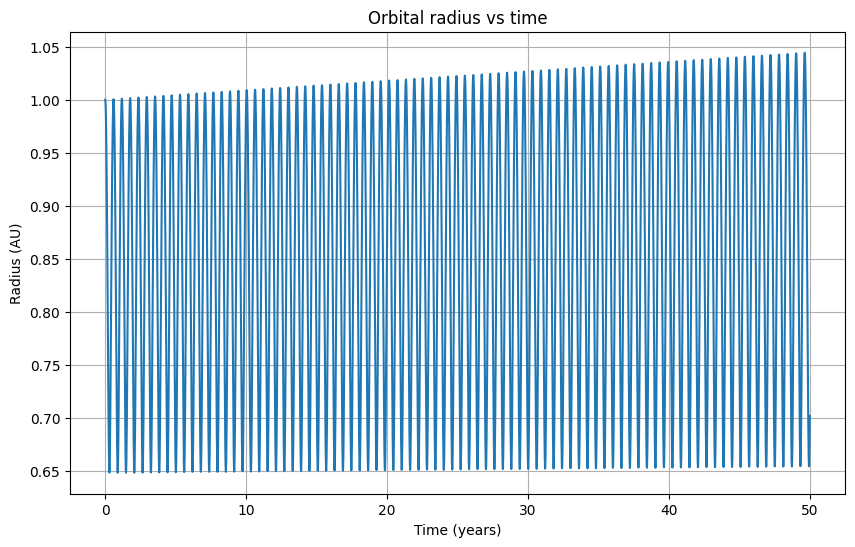

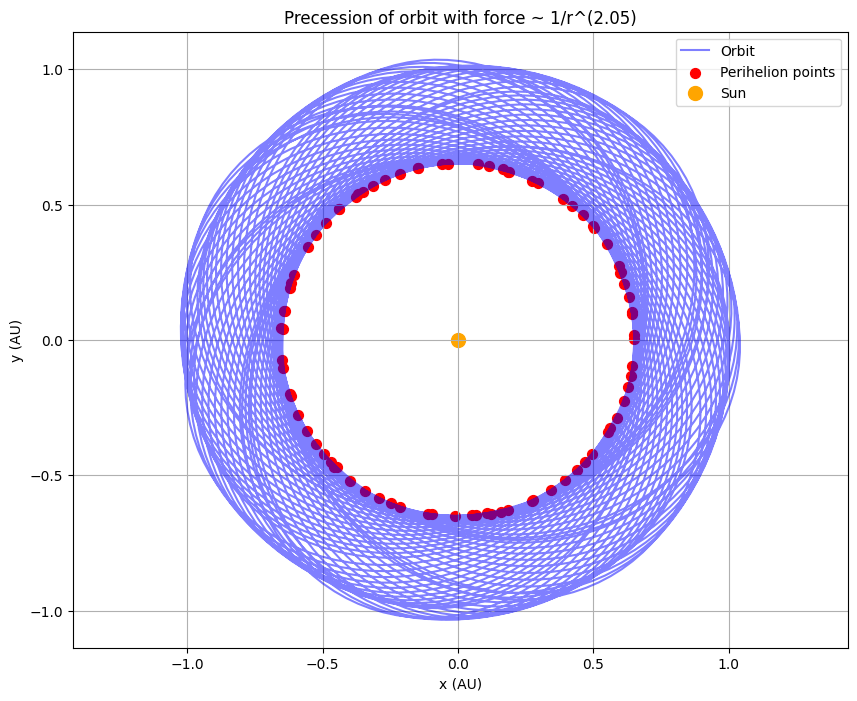

In [ ]:
# Find local maxima in radial distance to identify successive perihelion passages
radii = np.sqrt(x**2 + y**2)
angles = np.arctan2(y, x)

# Unwrap angles to handle multiple revolutions
angles = np.unwrap(angles)

# Function to find perihelion points (local minima in radius)
def find_perihelion_points(r, theta, min_separation=20):
    """Find indices of perihelion passages (local minima in radius)"""
    perihelion_indices = []
    for i in range(min_separation, len(r)-min_separation):
        if (r[i] < r[i-1]) and (r[i] < r[i+1]) and all(r[i] < r[i-j] for j in range(1, min_separation+1)):
            perihelion_indices.append(i)
    return perihelion_indices

perihelion_indices = find_perihelion_points(radii, angles)

# Calculate precession angle between successive perihelion passages
precession_angles = []
for i in range(1, len(perihelion_indices)):
    angle_diff = angles[perihelion_indices[i]] - angles[perihelion_indices[i-1]]
    precession = angle_diff - 2*np.pi  # Subtract one full revolution
    precession_angles.append(precession)

# Convert to degrees
precession_degrees = np.array(precession_angles) * 180/np.pi

# Print average precession per orbit
if len(precession_degrees) > 0:
    average_precession = np.mean(precession_degrees)
    print(f"Average precession per orbit: {average_precession:.2f} degrees")

# Plot radii over time to see if orbit is stable
plt.figure(figsize=(10, 6))
plt.plot(t, radii)
plt.xlabel('Time (years)')
plt.ylabel('Radius (AU)')
plt.title('Orbital radius vs time')
plt.grid(True)
plt.show()

# Plot perihelion points on the orbit
plt.figure(figsize=(10, 8))
plt.plot(x, y, 'b-', alpha=0.5, label='Orbit')
plt.scatter(x[perihelion_indices], y[perihelion_indices], color='red', s=50,
            label='Perihelion points')
plt.scatter(0, 0, color='orange', s=100, label='Sun')
plt.xlabel('x (AU)')
plt.ylabel('y (AU)')
plt.title(f'Precession of orbit with force ~ 1/r^({2+epsilon})')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()

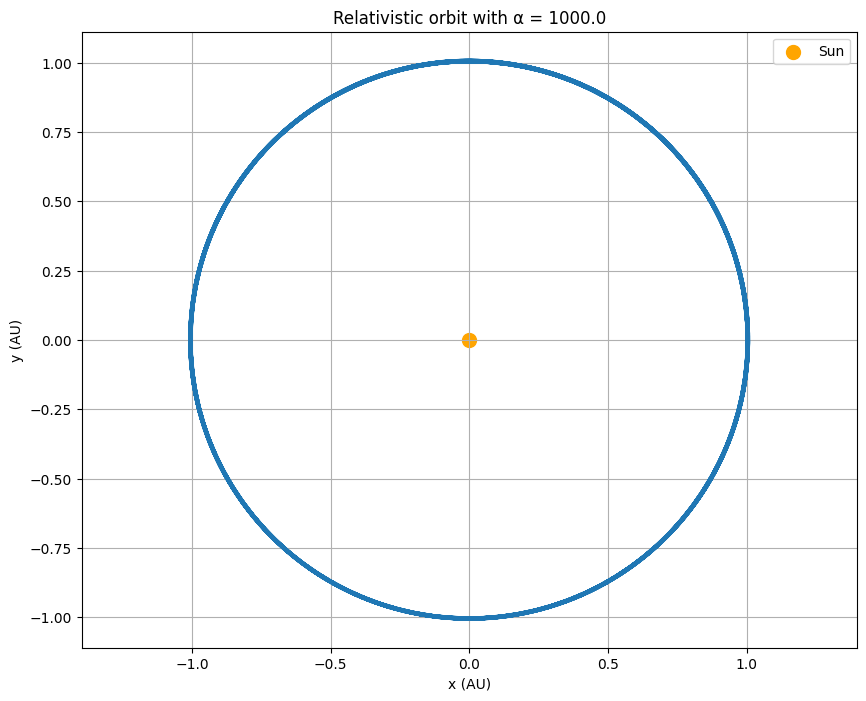

Average precession per orbit: -1.33 degrees


In [ ]:
def relativistic_force(t, state, alpha=1e3, GM=4*np.pi**2, c=1000):
    """
    Force with Einstein's general relativity correction

    Parameters:
    -----------
    t : float
        Time (unused but required for ODE solver)
    state : array
        [x, vx, y, vy, t] - position, velocity and time
    alpha : float
        Dimensionless parameter for GR correction
    GM : float
        Gravitational constant × mass (default 4*pi^2 in AU units)
    c : float
        Speed of light (in arbitrary units for this simulation)

    Returns:
    --------
    array: derivatives [dx/dt, dvx/dt, dy/dt, dvy/dt, dt/dt]
    """
    x, vx, y, vy, time = state
    r2 = x**2 + y**2
    r = np.sqrt(r2)

    # GR correction term
    correction = 1 + alpha * ((GM/c**2)**2) * (1/r2)

    # Derivatives
    dxdt = vx
    dvxdt = -GM * x * correction / r**3
    dydt = vy
    dvydt = -GM * y * correction / r**3
    dtdt = 1

    return np.array([dxdt, dvxdt, dydt, dvydt, dtdt])

# Initial conditions for part (b)
x0 = 1.0
y0 = 0.0
vx0 = 0.0
vy0 = 6.28  # approximately circular orbit velocity
alpha = 1e3  # as specified in the problem
t_span = [0, 50]
dt = 0.01

# Initial state
initial_state = np.array([x0, vx0, y0, vy0, 0.0])

# Solve ODE
t, y = solve_ode(lambda t, state: relativistic_force(t, state, alpha),
                 t_span, initial_state, EulerRichardson, dt=dt)

# Extract positions
x = y[:, 0]
y = y[:, 2]

# Plot orbit
plt.figure(figsize=(10, 8))
plt.plot(x, y)
plt.scatter(0, 0, color='orange', s=100, label='Sun')
plt.xlabel('x (AU)')
plt.ylabel('y (AU)')
plt.title(f'Relativistic orbit with α = {alpha}')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()

# Find perihelion points
radii = np.sqrt(x**2 + y**2)
angles = np.arctan2(y, x)
angles = np.unwrap(angles)
perihelion_indices = find_perihelion_points(radii, angles)

# Calculate precession
precession_angles = []
for i in range(1, len(perihelion_indices)):
    angle_diff = angles[perihelion_indices[i]] - angles[perihelion_indices[i-1]]
    precession = angle_diff - 2*np.pi
    precession_angles.append(precession)

# Convert to degrees
precession_degrees = np.array(precession_angles) * 180/np.pi

# Print average precession per orbit
if len(precession_degrees) > 0:
    average_precession = np.mean(precession_degrees)
    print(f"Average precession per orbit: {average_precession:.2f} degrees")

Analytical circular velocity for inverse cube law: 6.2832


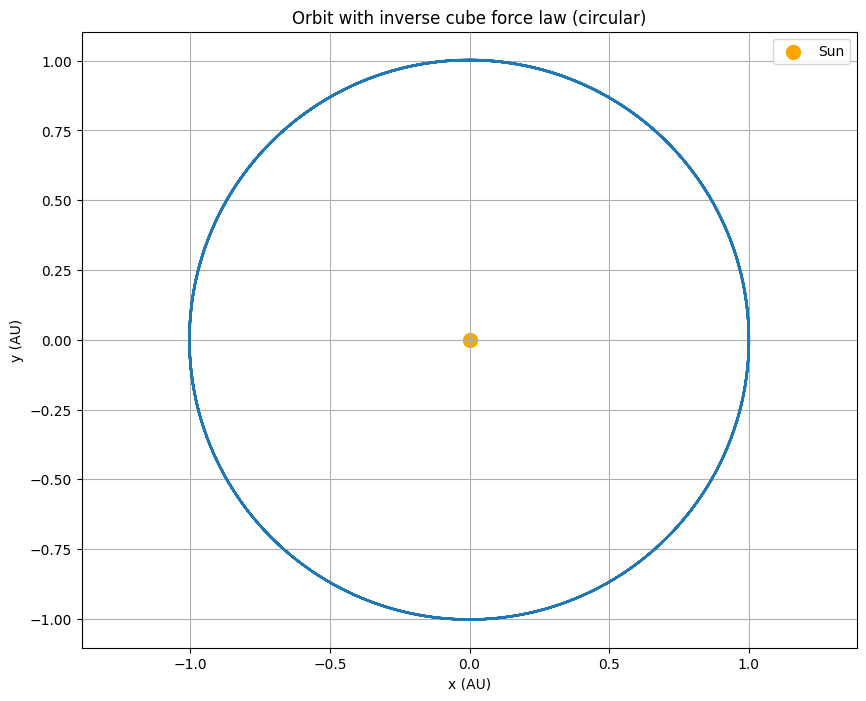

In [ ]:
def inverse_cube_force(t, state, C=4*np.pi**2):
    """
    Force with inverse cube law: F = C/r^3

    Parameters:
    -----------
    t : float
        Time (unused but required for ODE solver)
    state : array
        [x, vx, y, vy, t] - position, velocity and time
    C : float
        Force constant

    Returns:
    --------
    array: derivatives [dx/dt, dvx/dt, dy/dt, dvy/dt, dt/dt]
    """
    x, vx, y, vy, time = state
    r2 = x**2 + y**2
    r = np.sqrt(r2)

    # Derivatives
    dxdt = vx
    dvxdt = -C * x / r**3
    dydt = vy
    dvydt = -C * y / r**3
    dtdt = 1

    return np.array([dxdt, dvxdt, dydt, dvydt, dtdt])

# For a circular orbit with inverse cube force law:
# We need v^2/r = C/r^3 => v = sqrt(C/r^2)
x0 = 1.0
y0 = 0.0
vx0 = 0.0
C = 4*np.pi**2
r0 = np.sqrt(x0**2 + y0**2)
v_circular = np.sqrt(C/r0**2)
print(f"Analytical circular velocity for inverse cube law: {v_circular:.4f}")

# Test with this circular velocity
vy0 = v_circular
t_span = [0, 10]
dt = 0.001  # smaller step size for stability

# Initial state
initial_state = np.array([x0, vx0, y0, vy0, 0.0])

# Solve ODE
t, y = solve_ode(inverse_cube_force, t_span, initial_state, EulerRichardson, dt=dt)

# Extract positions
x = y[:, 0]
y = y[:, 2]

# Plot orbit
plt.figure(figsize=(10, 8))
plt.plot(x, y)
plt.scatter(0, 0, color='orange', s=100, label='Sun')
plt.xlabel('x (AU)')
plt.ylabel('y (AU)')
plt.title('Orbit with inverse cube force law (circular)')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Create a function to calculate energy
def calculate_energy(state, C=4*np.pi**2, force_type='inverse_cube'):
    """Calculate energy (per unit mass) for a given state"""
    x, vx, y, vy, _ = state
    r = np.sqrt(x**2 + y**2)
    kinetic = 0.5 * (vx**2 + vy**2)

    if force_type == 'inverse_cube':
        # For F = -C/r^3, potential is V = C/(2*r^2)
        potential = C/(2*r**2)
    else:  # inverse square
        # For F = -C/r^2, potential is V = -C/r
        potential = -C/r

    return kinetic + potential

# Try with 2% higher velocity than circular
variations = [0.98, 1.02]  # -2% and +2% of circular velocity
t_span = [0, 10]
dt = 0.001

plt.figure(figsize=(12, 10))

for i, var_factor in enumerate(variations):
    vy0 = v_circular * var_factor

    # Initial state
    initial_state = np.array([x0, vx0, y0, vy0, 0.0])

    # Calculate energy
    energy = calculate_energy(initial_state, force_type='inverse_cube')

    # Solve ODE
    t, y = solve_ode(inverse_cube_force, t_span, initial_state, EulerRichardson, dt=dt)

    # Extract positions
    x = y[:, 0]
    y = y[:, 2]

    # Calculate energies over time
    energies = np.array([calculate_energy(state, force_type='inverse_cube') for state in y])

    # Plot orbit
    plt.subplot(2, 2, i+1)
    plt.plot(x, y)
    plt.scatter(0, 0, color='orange', s=100, label='Sun')
    plt.xlabel('x (AU)')
    plt.ylabel('y (AU)')
    plt.title(f'Orbit with {var_factor*100:.0f}% of circular velocity')
    plt.axis('equal')
    plt.grid(True)
    plt.legend()

    # Plot energy
    plt.subplot(2, 2, i+3)
    plt.plot(t, energies)
    plt.axhline(y=energy, color='r', linestyle='--', label='Initial energy')
    plt.xlabel('Time (years)')
    plt.ylabel('Energy')
    plt.title(f'Energy over time (E = {energy:.4f})')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

# Determine if orbits are closed
def is_orbit_closed(x, y, threshold=1e-2):
    """Check if an orbit is approximately closed"""
    # Calculate distance between start and end points
    start_point = np.array([x[0], y[0]])

    # Find points that return close to the starting point
    distances = []
    for i in range(len(x)):
        dist = np.sqrt((x[i] - start_point[0])**2 + (y[i] - start_point[1])**2)
        if i > 100 and dist < threshold:  # Skip initial points
            distances.append((i, dist))

    return distances

for i, var_factor in enumerate(variations):
    vy0 = v_circular * var_factor

    # Initial state
    initial_state = np.array([x0, vx0, y0, vy0, 0.0])

    # Solve ODE with longer time span
    t_span = [0, 30]
    t, y = solve_ode(inverse_cube_force, t_span, initial_state, EulerRichardson, dt=dt)

    # Extract positions
    x = y[:, 0]
    y = y[:, 2]

    # Check if orbit is closed
    close_points = is_orbit_closed(x, y)

    print(f"For velocity = {var_factor*100:.0f}% of circular:")
    if close_points:
        print(f"  Orbit appears to close after {t[close_points[0][0]]:.2f} years")
        energy = calculate_energy(initial_state, force_type='inverse_cube')
        print(f"  Energy = {energy:.4f} ({'positive' if energy > 0 else 'negative'})")
    else:
        print("  Orbit does not appear to close within the simulation time")

TypeError: cannot unpack non-iterable numpy.float64 object

<Figure size 1200x1000 with 0 Axes>